#### Time for an exercise session on the Data Manipulation. We will continue working with the wine dataset.

Columns in the dataset:
- "country": Country of which the wine was produced
- "description": Description of the taste (qualitative)
- "designation": Amount of points a profesisonal wine taster rated the wine
- "points": Points rated by the wine taster (quantitative)
- "price": Selling price of the wine
- "province": Province of the country which the wine originates from
- "region_1": One entry of which region the wine originates from
- "region_2": Another entry of which region the wine originates from
- "taster_name": Name of the professional wine taster who rated the wine
- "taster_twitter_handle": Twitter username of the professional wine taster
- "title": Competition of which the wine taster tasted the wine
- "variety": Category of wine

#### Start with loading the dataset from the data subfolder

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data/wine.csv", index_col=0)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


(array([ 1089.,  4861., 16010., 29533., 29433., 26769., 16102.,  5293.,
          752.,   129.]),
 array([ 80.,  82.,  84.,  86.,  88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <BarContainer object of 10 artists>)

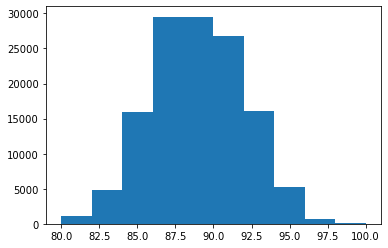

In [3]:
# plotting a histogram to show the distribution of data
fig, ax = plt.subplots()
ax.hist(df["points"])

<BarContainer object of 43 artists>

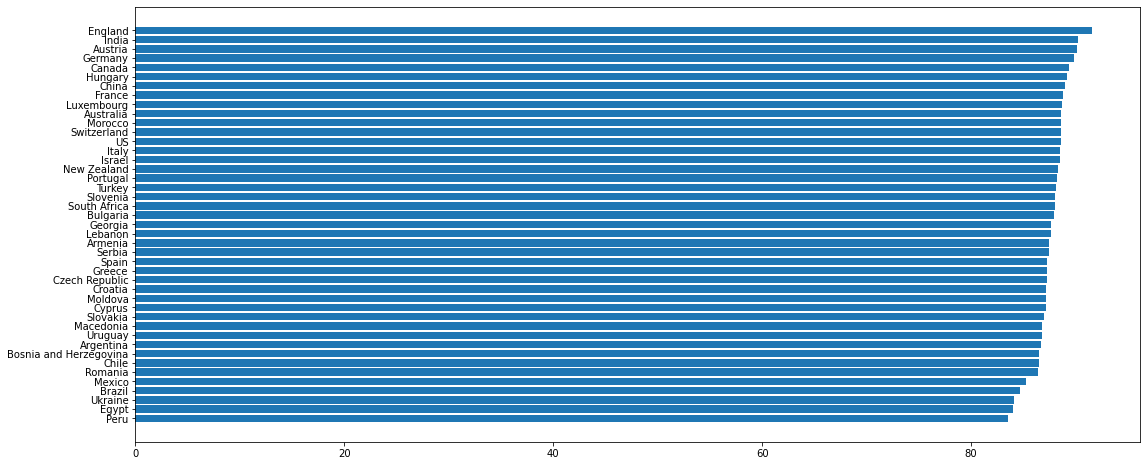

In [4]:
# using a "groupby" to summarize results on country level
temp = df[["points", "country"]].copy()

temp = temp.groupby(by=["country"]).mean() # variations: .max() .min() .mean() .median() .count()
temp = temp.sort_values(by=["points"])

fig, ax = plt.subplots(figsize=(18,8))
ax.barh(temp.index, temp["points"])

Mean absolute error: 2.24
This metric means that we predict only 2.24 points incorrect on average. It might seem as a good result, but in reality, its not.


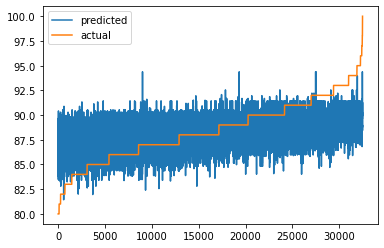

In [7]:
# a generic setup to predict something using Machine Learning in Python
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# in this example, we want to predict the rating of points of a wine
# given that we know which country it is from, and what variety of wine it is
temp = df[["points", "country", "variety"]].copy()

# here, we encode the columns "country" and "variety" because it is string (text). We need to encode (encode = transform)
# to make this into numbers which represents the data
scaler = LabelEncoder()
temp["country"] = scaler.fit_transform(temp["country"])
temp["variety"] = scaler.fit_transform(temp["variety"])

# we split the data into x variables and y variables (we use x to predict y)
x = temp[["country", "variety"]]
y = temp["points"]

# we split the data into "training data" and "testing data"
# we use the relationships estimated in the training data to predict what is located in the testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=0)

# we train our model to fit the data
model = RandomForestRegressor()
model.fit(x_train, y_train)

# we use the fitted model to predict our testing data
y_pred = model.predict(x_test)

predictions = pd.DataFrame({'prediction': np.array(y_pred),
                            'actual': np.array(y_test.reset_index(drop=True))}).sort_values(by=["actual"]).reset_index()


# plotting the predictions
fig, ax = plt.subplots()
ax.plot(predictions["prediction"], label="predicted")
ax.plot(predictions["actual"], label="actual")
ax.legend()

print("Mean absolute error:", round(mean_absolute_error(predictions["prediction"], predictions["actual"]), 2))
print("This metric means that we predict only 2.24 points incorrect on average. It might seem as a good result, but in reality, its not.")
print("(The bad predictions are visualized in the plot below)")

## What could be interesting for companies and projects?
- Prediction the sales of the company in the next period
    - Examples:
        - Relationship between ice cream and temperature
        - Prediction when to do the next maintenance in the production facility
        - What product is sold most in each month
    - Methods:
        - Regression analysis
        - Correlation analysis
- Figure out when is the optimal time to buy stock (inventory)
- Figure out which items is most frequently bought together (recommendation systems)
    - Methods:
        - Frequent Itemset
- Sentiment analysis of customer reviews
- Anything related to being green
    - Examples:
        - Reducing waste (Waste Managment)
        - Reducting electrical consumption 
- Web Scraping (for data)
    - Python package: beautifulsoup4